In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture


In [2]:
# Load an example wine dataset or replace with your own
df = pd.read_csv("../winequality.csv")

# Fill missing data with either random data or a category corresponding to "Unknown"
for column in df.columns:
    if df[column].isna().any() and pd.api.types.is_numeric_dtype(df[column]):
        df.loc[df[column].isna(), column] = [i for i in np.random.choice(range(round(df[column].min()), round(df[column]. max())), df[column].isna().sum())]
    elif df[column].isna().any() and (pd.api.types.is_object_dtype(df[column]) or pd.api.types.is_categorical_dtype(df[column])):
        df[column].fillna("Unknown")

# One-hot encode wine type
for column in df.columns:
    if pd.api.types.is_categorical_dtype(df[column]) or pd.api.types.is_object_dtype(df[column]):
        one_hot = pd.get_dummies(df[column], prefix=column)
        df = df.drop(column, axis = 1)
        df = df.join(one_hot)

# Write a function for generating either a red or whit GMM

X = df.drop("quality", axis=1)
y = df["quality"]


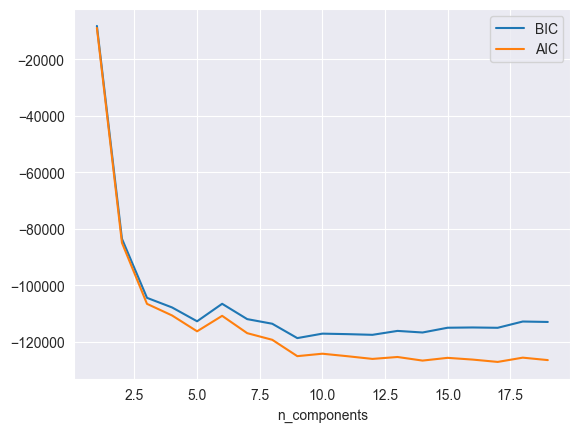

In [3]:
# Find optimal number of components
n_components = np.arange(1, 20)
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [4]:
# Create GMM
gmm = mixture.GaussianMixture(n_components=8, covariance_type='full', random_state=0)
gmm.fit(X)

GaussianMixture(n_components=8, random_state=0)

In [5]:
# Sample from the GMM
X_new, y_new = gmm.sample(4)

# Add synthetic data to the original DataFrame
synthetic_df = pd.DataFrame(X_new, columns=X.columns)
synthetic_df['quality'] = y_new

display(synthetic_df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white,quality
0,3.707611,0.633805,-0.036409,2.010501,0.079708,27.425183,56.019236,0.996535,3.720939,0.532213,9.429925,1.000033,0.000377,1
1,6.668463,0.186768,0.285584,13.448834,0.050215,53.364166,132.698501,0.996909,3.250958,0.339421,9.896268,0.001078,0.998605,4
2,5.636654,0.160149,0.269312,2.365857,0.048675,21.752137,60.213589,0.990251,3.167569,0.465478,11.668320,-0.000031,0.999861,6
3,5.789313,0.300513,0.311545,8.402445,0.045540,28.310178,130.938041,0.994550,3.372790,0.601695,10.336820,0.001120,0.999542,6
